In [291]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [223]:
dst = pd.read_csv('defense_stats_and_projections.csv')
qbs = pd.read_csv('qb_stats_and_projections.csv')
wrs = pd.read_csv('wr_stats_and_projections.csv')
rbs = pd.read_csv('rb_stats_and_projections.csv')
te = pd.read_csv('te_stats_and_projections.csv')
ks = pd.read_csv('kicker_stats_and_projections.csv')


In [272]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
wrs = wrs.rename(columns={"POSITION": "PLAYER POSITION"})
temp_dst = dst.rename(columns={"TEAM NAME": "PLAYER NAME"})
temp_dst['PLAYER POSITION'] = 'DST'
# NFL_df = pd.concat([qbs, wrs, rbs, te, temp_dst, ks], sort = True)
# print(NFL_df.columns)
# print(qbs.columns)
# print(temp_dst.columns)
# print(wrs.columns)
# print(rbs.columns)

In [225]:
def clean_dataset(df):
    return df.replace(np.nan, 0.0, inplace=True) # Turns all nan values to 0.0

In [271]:
clean_dataset(wrs)
clean_dataset(qbs)
clean_dataset(NFL_df) # clean the dataset replacce nan with 0.0 

In [275]:
NFL_df = pd.concat([qbs, wrs, rbs, te], sort = True)

In [276]:
NFL_df = NFL_df.drop(['2019 ATTEMPTED PASS', '2019 AVG REC YARDS', '2019 AVG REC YDS',
       '2019 CAR', '2019 COMPLETED PASS', '2019 FPTS', '2019 INT',
       '2019 PASSING TD', '2019 PASSING YDS', '2019 REC', '2019 REC TD',
       '2019 REC TDS', '2019 REC YARDS', '2019 REC YDS', '2019 RUSH AVG',
       '2019 RUSH CAR', '2019 RUSH TD', '2019 RUSH TDS', '2019 RUSH YARDS',
       '2019 RUSH YDS', '2019 TAR'], axis=1)
NFL_df.columns

Index(['2020 ATTEMPTED PASS', '2020 AVG REC YARDS', '2020 AVG REC YDS',
       '2020 CAR', '2020 COMPLETED PASS', '2020 FPTS', '2020 INT',
       '2020 OUTLOOK', '2020 PASSING TD', '2020 PASSING YDS',
       '2020 PLAYER OUTLOOK', '2020 REC', '2020 REC TD', '2020 REC TDS',
       '2020 REC YARDS', '2020 REC YDS', '2020 RUSH AVG', '2020 RUSH CAR',
       '2020 RUSH TD', '2020 RUSH TDS', '2020 RUSH YARDS', '2020 RUSH YDS',
       '2020 TAR', 'PLAYER NAME', 'PLAYER POSITION', 'POINTS',
       'Player OUTLOOK', 'TEAM', 'TEAM NAME', 'USAGE', 'Unnamed: 0'],
      dtype='object')

In [283]:
# FPTS_df = NFL_df[['PLAYER NAME', 'PLAYER POSITION','2019 FPTS', '2020 FPTS', ]]
# FPTS_df

wrs['POINTS'] = (wrs['2020 REC YARDS']*0.1 + wrs['2020 REC TDS']*6+ wrs['2020 RUSH YARDS']*0.1 + wrs['2020 RUSH TDS']*6) #- rb_df['FL']*2)
wrs['USAGE'] = (wrs['2020 TAR'] + wrs['2020 RUSH CAR'])

qbs['POINTS'] = (qbs['2020 PASSING YDS']*0.04 + qbs['2020 PASSING TD']*6 + qbs['2020 RUSH TD']*6+ qbs['2020 RUSH YDS']*0.1 - qbs['2020 INT']*2)
qbs['USAGE'] = (qbs['2020 ATTEMPTED PASS'] + qbs['2020 CAR'])

NFL_df['POINTS'] = (NFL_df['2020 REC YARDS']*0.1 + NFL_df['2020 REC TDS']*6 + NFL_df['2020 RUSH YDS']*0.1 + NFL_df['2020 REC TDS']*6 + NFL_df['2020 RUSH TD']*6 + NFL_df['2020 PASSING YDS']*0.04 + NFL_df['2020 PASSING TD']*6- NFL_df['2020 INT']*2)
NFL_df['USAGE'] = (NFL_df['2020 TAR'] + NFL_df['2020 RUSH CAR'] + NFL_df['2020 ATTEMPTED PASS'] + NFL_df['2020 CAR'])


In [231]:
qbs_start = qbs[qbs.USAGE >= 200.0]  #We care about only the starting quarter backs who have value

In [232]:
qb_avg = qbs_start['POINTS'].mean()
print(qb_avg)

294.64


In [233]:
def rmse(actual, predicted):
    """Calculates RMSE from actual and predicted values"""
    return np.sqrt(np.mean((actual-predicted)**2))

In [234]:
x1 = qbs['USAGE'].values.reshape(-1,1)
y1 = qbs['POINTS'].values.reshape(-1,1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x1_train, y1_train)
y1_pred = regressor.predict(x1_test)

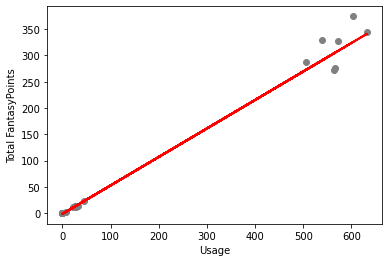

In [235]:
plt.scatter(x1_test, y1_test,  color='gray')
plt.plot(x1_test, y1_pred, color='red', linewidth=2)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.show()

In [236]:
rmse(y1_test, y1_pred) # Standard error of points per QB and usage

16.07464543035994

In [237]:
x = wrs['USAGE'].values.reshape(-1, 1)
y = wrs['POINTS'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm
y_pred = regressor.predict(x_test)

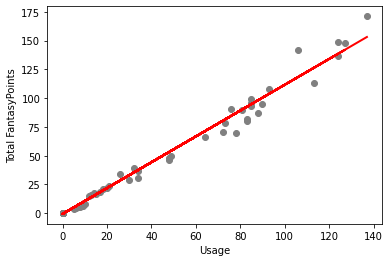

In [238]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.show()

In [239]:
rmse(y_test,y_pred) #Error of our Prediction most WR perform regularly under usage

5.7732321650908025

In [298]:
r2_wr = r2_score(y_test, y_pred)
r2_qb = r2_score(y1_test, y1_pred)
print("coeffecient of determination:" , r2_wr) # Strong correlation between WR usage and WR fantasy points
print("coeffecient of determination:" , r2_qb)

coeffecient of determination: 0.9847091096554346
coeffecient of determination: 0.986955247513537


In [292]:
rank_wr = wrs.sort_values(['USAGE'], ascending=[False]) #Since there is a strong correlation between 
# rank_wr.head(10)
rank_qb = qbs.sort_values(['USAGE'], ascending= [False]) 
# rank_qb.head(10)

In [306]:
clean_dataset(NFL_df)
x2 = NFL_df['USAGE'].values.reshape(-1,1)
y2 = NFL_df['POINTS'].values.reshape(-1,1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x2_train, y2_train)
y2_pred = regressor.predict(x2_test)

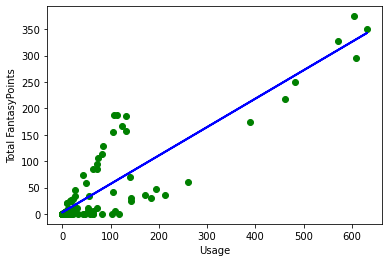

In [307]:
plt.scatter(x2_test, y2_test,  color='green')
plt.plot(x2_test, y2_pred, color='blue', linewidth=2)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.show()

In [293]:
rank_LEAGUE = NFL_df.sort_values(['USAGE'], ascending= [False])
# rank_LEAGUE.head(100)

In [308]:
LEAGUE = r2_score(y2_test, y2_pred)
print("coeffecient of determination:" , LEAGUE) # Correlation is not that strong so its unwise to use this but instead use separate rankings
print("Error in points:", rmse(y2_test, y2_pred))
# accuracy = accuracy_score(y2, y2_pred)
# print(accuracy)

coeffecient of determination: 0.7906181930234907
Error in points: 29.486804515059248


ValueError: Found input variables with inconsistent numbers of samples: [920, 184]